In [42]:
import numpy as np
import pandas
from matplotlib import pyplot as plt

In [43]:
data = pandas.read_csv('classification.csv')
print(data)

     true  pred
0       1     0
1       1     1
2       1     1
3       0     0
4       1     1
..    ...   ...
195     0     0
196     0     0
197     1     0
198     0     1
199     0     0

[200 rows x 2 columns]


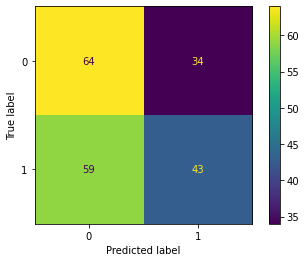

In [44]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
a = confusion_matrix(data.true, data.pred)
ConfusionMatrixDisplay(a).plot()

In [45]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [46]:
print(accuracy_score(data.true, data.pred))
print(precision_score(data.true, data.pred))
print(recall_score(data.true, data.pred))
print(f1_score(data.true, data.pred))

0.535
0.5584415584415584
0.4215686274509804
0.48044692737430167


In [47]:
scores = pandas.read_csv('scores.csv')
print(scores)

     true  score_logreg  score_svm  score_knn  score_tree
0       0      0.683832   0.145976   0.787063    0.500000
1       1      0.801966   0.239511   1.000000    0.833333
2       0      0.382315  -0.245701   0.000000    0.000000
3       1      0.506797  -0.137058   0.000000    0.105263
4       1      0.488781  -0.154148   0.000000    0.105263
..    ...           ...        ...        ...         ...
195     0      0.573801  -0.088203   0.284192    0.400000
196     0      0.624422  -0.012315   0.205437    0.400000
197     1      0.425538  -0.135673   0.382351    0.700000
198     0      0.905270   0.583806   1.000000    1.000000
199     0      0.275594  -0.422160   0.743567    0.642857

[200 rows x 5 columns]


In [48]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(scores.true, scores.score_logreg))
print(roc_auc_score(scores.true, scores.score_svm))
print(roc_auc_score(scores.true, scores.score_knn))
print(roc_auc_score(scores.true, scores.score_tree))

0.719187675070028
0.7086834733893557
0.6351540616246498
0.6919267707082833


In [78]:
from sklearn.metrics import precision_recall_curve, average_precision_score

precision, recall, _ = precision_recall_curve(scores.true, scores.score_logreg)
max_prec = precision[(recall >= 0.7)].max()
print(max_prec)

precision, recall, _ = precision_recall_curve(scores.true, scores.score_svm)
max_prec = precision[(recall >= 0.7)].max()
print(max_prec)

precision, recall, _ = precision_recall_curve(scores.true, scores.score_knn)
max_prec = precision[(recall >= 0.7)].max()
print(max_prec)

precision, recall, _ = precision_recall_curve(scores.true, scores.score_tree)
max_prec = precision[(recall >= 0.7)].max()
print(max_prec)

0.6302521008403361
0.6228070175438597
0.6065573770491803
0.6517857142857143


In [41]:
from sklearn.metrics import precision_recall_curve
curve = precision_recall_curve(scores.true, scores.score_logreg)
i = 0
while curve[1][i] >= 0.7:
    i+=1
print(precision_score(scores.true, scores.score_logreg))

curve = precision_recall_curve(scores.true, scores.score_svm)
svm_cutted = []
true = []
i = 0
while curve[1][i] >= 0.7:
    svm_cutted.append(curve[0][i])
    true.append(scores.true[i])
    i+=1
    
print(precision_score(true, svm_cutted))

curve = precision_recall_curve(scores.true, scores.score_knn)
knn_cutted = []
true = []
i = 0
while curve[1][i] >= 0.7:
    knn_cutted.append(curve[0][i])
    true.append(scores.true[i])
    i+=1
print(precision_score(true, knn_cutted))
    
curve = precision_recall_curve(scores.true, scores.score_tree)
tree_cutted = []
true = []
i = 0
while curve[1][i] >= 0.7:
    tree_cutted.append(curve[0][i])
    true.append(scores.true[i])
    i+=1
print(precision_score(scores.true, tree_cutted))


ValueError: Classification metrics can't handle a mix of binary and continuous targets